In [129]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')

In [130]:
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region'], dtype='object')

In [131]:
df2017 = df[(df['Date'] > '2016-12-31') & (df['Date'] < '2018-01-01')]
df2017.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [132]:
# List the top 10 tracks in the global throughout year 2017 
# with their total stream counts.
df_track2017 = df2017[['Track Name', 'Streams']].groupby('Track Name').sum()
df_rank_track2017 = df_track2017.sort_values('Streams', ascending=False)
df_rank_track2017[0:10]

,Streams
Track Name,
Shape of You,2954314942
Despacito - Remix,1808988398
Despacito (Featuring Daddy Yankee),1449083311
Something Just Like This,1366414897
Unforgettable,1341220672
HUMBLE.,1288359986
I'm the One,1241605052
rockstar,1186411578
It Ain't Me (with Selena Gomez),1179203261


In [133]:
# List the top 10 artists (or groups) those has the most stream counts for all their tracks combined, 
# with the stream counts of each of their tracks.

df_artist_track2017 = df2017[['Track Name', 'Artist', 'Streams']] \
    .groupby(['Track Name', 'Artist'], as_index=False,) \
    .sum()
top_df_artist2017 = df_artist_track2017.groupby('Artist').sum().sort_values('Streams', ascending=False).head(10)
print(top_df_artist2017)
# print(df_artist_track2017.columns)
# top_df_artist_track2017 = \
#     df_artist_track2017[df_artist_track2017['Artist']
#                         .isin(top_df_artist2017.index)].reset_index(drop=True)


                     Streams
Artist                      
Ed Sheeran        8739587055
Drake             4499119727
The Chainsmokers  4249854428
Post Malone       3517577254
Kendrick Lamar    3500732789
Luis Fonsi        3477767680
J Balvin          2444474359
Calvin Harris     2382436555
Imagine Dragons   2266496410
DJ Khaled         2211619142


In [134]:
# List the top 10 tracks in December, 
# 2017 for each continent (North America, Europe, Asia, South America, Oceania).

import pycountry_convert as pc

df_dec2017 = df2017[(df['Date'] > '2017-11-30') & (df['Date'] < '2018-01-01')].reset_index(drop=True)
# continent = pc.country_alpha2_to_continent_code('HK')

# Converting country code to continent code. 
df_dec2017['Region'] = df_dec2017['Region'].str.upper()
df_dec2017 = df_dec2017[df_dec2017['Region'] != 'GLOBAL']
df_dec2017['Continent'] = df_dec2017['Region'].apply(pc.country_alpha2_to_continent_code)

df_asia = df_dec2017[df_dec2017['Continent'] == 'AS']
df_top_asia = df_asia.groupby(['Track Name'], as_index=False,) \
    .sum().sort_values('Streams', ascending=False).head(10).reset_index(drop=True)
print("Top Asia \n", df_top_asia)

df_namerica = df_dec2017[df_dec2017['Continent'] == 'NA']
df_top_namerica = df_namerica.groupby(['Track Name'], as_index=False,) \
    .sum().sort_values('Streams', ascending=False).head(10).reset_index(drop=True)
print("Top North America \n", df_top_namerica)

df_samerica = df_dec2017[df_dec2017['Continent'] == 'SA']
df_top_samerica = df_samerica.groupby(['Track Name'], as_index=False,) \
    .sum().sort_values('Streams', ascending=False).head(10).reset_index(drop=True)
print("Top South America \n", df_top_samerica)

df_europe = df_dec2017[df_dec2017['Continent'] == 'EU']
df_top_europe = df_europe.groupby(['Track Name'], as_index=False,) \
    .sum().sort_values('Streams', ascending=False).head(10).reset_index(drop=True)
print("Top Europe \n", df_top_europe)


df_oceania = df_dec2017[df_dec2017['Continent'] == 'OC']
df_top_oceania = df_oceania.groupby(['Track Name'], as_index=False,) \
    .sum().sort_values('Streams', ascending=False).head(10).reset_index(drop=True)
print("Top Oceania \n", df_top_oceania)




/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Top Asia 
                                           Track Name  Position   Streams
0                                             Havana       931  14704046
1                               Too Good At Goodbyes      4237  12151470
2                                            Perfect      4838  12126620
3                                             Wolves      1467  11745050
4                                          New Rules      2092  11535430
5                         What Lovers Do (feat. SZA)      3003  10880513
6                Perfect Duet (Ed Sheeran & Beyoncé)      4071   9004183
7  Let Me Go (with Alesso, Florida Georgia Line &...      6519   8279975
8                                 Young Dumb & Broke      9608   8241744
9                        Dusk Till Dawn - Radio Edit      4987   8202373
Top North America 
                         Track Name  Position   Streams
0                         rockstar      4426  62265844
1                       Gucci Gang      9252  40603607
2

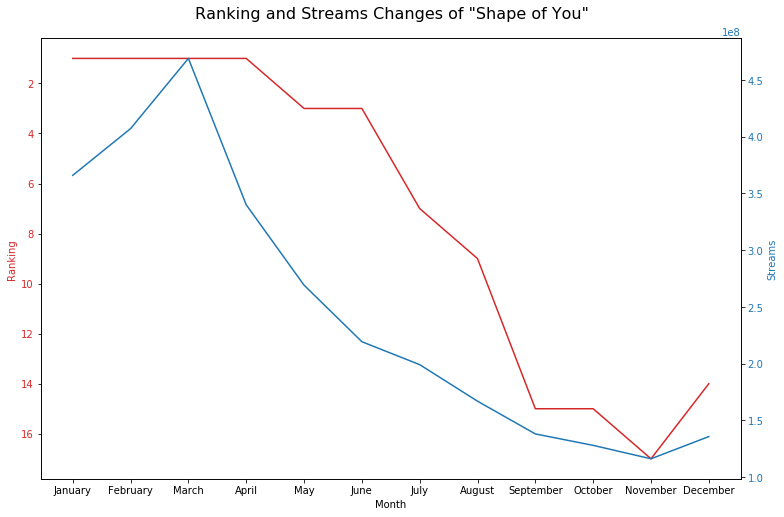

In [184]:
import matplotlib.pyplot as plt

df2017 = df2017[['Track Name', 'Artist', 'Streams', 'Date']]

# Plot the ranking changes of "Shape of You"
df_by_day = df2017.groupby(['Track Name', 'Artist', 'Date'], as_index=False,).sum()
# print(df_by_day.columns)
df_by_day.Date = pd.to_datetime(df_by_day.Date)
df_by_month = df_by_day.groupby([
    pd.Grouper('Track Name'), 
    pd.Grouper('Artist'),
    pd.Grouper(key='Date', freq='1M')]).sum().reset_index()
# groupby each 1 month
df_by_month['Date'] = df_by_month['Date'].dt.strftime('%B')
# print(df_by_month.columns)

df_by_month['Rank'] = df_by_month.groupby('Date')['Streams'].rank("dense", ascending=False)
df_rank_soy = df_by_month[df_by_month['Track Name'] == 'Shape of You'].reset_index(drop=True)

# Plot the ranking change along with the 
t = df_rank_soy.Date
data1 = df_rank_soy['Rank']
data2 = df_rank_soy['Streams']
fig, ax1 = plt.subplots(figsize=(11, 7))
fig.suptitle('Ranking and Streams Changes of \"Shape of You\"', fontsize=16, y=1.02)

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Ranking', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Streams', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1 = ax1.invert_yaxis()

plt.show()


# Here from the figure we can find that in March the streams number is the peek and then decrease month by month. 
# For the ranking we can see that it peeks for several month then falls monthly. 
# After March, although the streams drops a little, but the ranking is still 1. 
# After the streams drops further, the ranking starts to fall down. 



In [ ]:
## Old code, not useful
# # Plot the change of streams of Shape of You
# df_soy = df2017[df2017['Track Name'] == 'Shape of You'].reset_index(drop=True)

# # print(df_soy)
# df_soy = df_soy.groupby(['Date'], as_index=False,).sum()
# print(df_soy['Streams'])

# df_soy.Date = pd.to_datetime(df_soy.Date)
# df_month_streams = df_soy.groupby(pd.Grouper(key='Date', freq='1M')).sum() # groupby each 1 month
# df_month_streams.index = df_month_streams.index.strftime('%B')

# # Plot the figure
# plt.figure(figsize=(14, 7))
# plt.plot(df_rank_soy.Date, df_rank_soy['Rank'])
# plt.plot(df_rank_soy.Date, df_rank_soy['Streams'])

# plt.xlabel('Months')
# plt.ylabel('Change of Shape of You')
# plt.title('Stream Change of Shape of You')
# plt.show()